In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pprint import pprint

In [4]:
# create state space and initial state probabilities

states = ['sleeping', 'eating', 'pooping']
pi = [0.35, 0.35, 0.3]
state_space = pd.Series(pi, index = states, name = 'states')
print(state_space)
state_space.sum()

sleeping    0.35
eating      0.35
pooping     0.30
Name: states, dtype: float64


1.0

In [5]:
# create transition matrix
# equals transition probability matrix of changing states given a state
# matrix is size (M x M) where M is a number of states

q_df = pd.DataFrame(columns = states, index = states)
q_df.loc[states[0]] = [0.4, 0.2, 0.4]
q_df.loc[states[1]] = [0.45, 0.45, 0.1]
q_df.loc[states[2]] = [0.45, 0.25, 0.3]

print(q_df)

q = q_df.values
print(q, q.shape)
print(q_df.sum(axis = 1))

         sleeping eating pooping
sleeping      0.4    0.2     0.4
eating       0.45   0.45     0.1
pooping      0.45   0.25     0.3
[[0.4 0.2 0.4]
 [0.45 0.45 0.1]
 [0.45 0.25 0.3]] (3, 3)
sleeping    1.0
eating      1.0
pooping     1.0
dtype: float64


In [6]:
def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx, col)] = Q.loc[idx, col]
    return edges

edges_wts = _get_markov_edges(q_df)
pprint(edges_wts)

{('eating', 'eating'): 0.45,
 ('eating', 'pooping'): 0.1,
 ('eating', 'sleeping'): 0.45,
 ('pooping', 'eating'): 0.25,
 ('pooping', 'pooping'): 0.3,
 ('pooping', 'sleeping'): 0.45,
 ('sleeping', 'eating'): 0.2,
 ('sleeping', 'pooping'): 0.4,
 ('sleeping', 'sleeping'): 0.4}


Nodes:
 ['sleeping', 'eating', 'pooping']
Edges:
OutMultiEdgeDataView([('sleeping', 'sleeping', {'weight': 0.4, 'label': 0.4}), ('sleeping', 'eating', {'weight': 0.2, 'label': 0.2}), ('sleeping', 'pooping', {'weight': 0.4, 'label': 0.4}), ('eating', 'sleeping', {'weight': 0.45, 'label': 0.45}), ('eating', 'eating', {'weight': 0.45, 'label': 0.45}), ('eating', 'pooping', {'weight': 0.1, 'label': 0.1}), ('pooping', 'sleeping', {'weight': 0.45, 'label': 0.45}), ('pooping', 'eating', {'weight': 0.25, 'label': 0.25}), ('pooping', 'pooping', {'weight': 0.3, 'label': 0.3})])


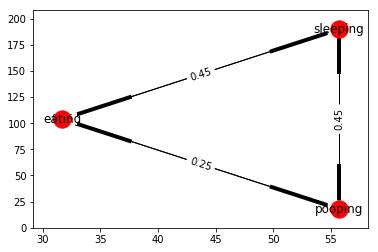

In [7]:
# Create graph object
G = nx.MultiDiGraph()

# Nodes correspond to states
G.add_nodes_from(states)
print('Nodes:\n', G.nodes())

# Edges represents transition probabilities
for k, v in edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight = v, label = v)

print('Edges:')
pprint(G.edges(data = True))

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog = 'dot')
nx.draw_networkx(G, pos)

# Create edge labels for jupyter plot but is not necessary
edge_labels = {(n1, n2): d['label'] for n1, n2, d in G.edges(data = True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'pet_dog_markov.dot')

# command line to convert the .dot file to .png
# $ dot -Tpng pet_dog_markov.dot -o pet_dog_markov.png

In [8]:
# create state space and initial state probabilities
hidden_states = ['healthy', 'sick']
pi = [0.5, 0.5]
state_space = pd.Series(pi, index = hidden_states, name = 'states')
print(state_space)
print(state_space.sum())

healthy    0.5
sick       0.5
Name: states, dtype: float64
1.0


In [9]:
# create hidden transition matrix
# a or alpha
#   = transition probability matrix of changing states given a state
# matrix is size (M x M) where M is the number of states

a_df = pd.DataFrame(columns = hidden_states, index = hidden_states)
a_df.loc[hidden_states[0]] = [0.7, 0.3]
a_df.loc[hidden_states[1]] = [0.4, 0.6]

print(a_df, '\n')

a = a_df.values
print(a, a.shape, '\n')
print(a_df.sum(axis = 1))

        healthy sick
healthy     0.7  0.3
sick        0.4  0.6 

[[0.7 0.3]
 [0.4 0.6]] (2, 2) 

healthy    1.0
sick       1.0
dtype: float64


In [10]:
# create matrix of observation (emission) probabilities
# b or beta = observation probabilities given state
# matrix is size (M x O) where M is the number of states
# and O is the number of different possible observations

observable_states = states
b_df = pd.DataFrame(columns = observable_states, index = hidden_states)
b_df.loc[hidden_states[0]] = [0.2, 0.6, 0.2]
b_df.loc[hidden_states[1]] = [0.4, 0.1, 0.5]

print(b_df)

b = b_df.values

print(b, b.shape)
b_df.sum(axis = 1)

        sleeping eating pooping
healthy      0.2    0.6     0.2
sick         0.4    0.1     0.5
[[0.2 0.6 0.2]
 [0.4 0.1 0.5]] (2, 3)


healthy    1.0
sick       1.0
dtype: float64

In [11]:
# create graph edges and weights
hide_edges_wts = _get_markov_edges(a_df)
pprint(hide_edges_wts)

emit_edges_wts = _get_markov_edges(b_df)
pprint(emit_edges_wts)

{('healthy', 'healthy'): 0.7,
 ('healthy', 'sick'): 0.3,
 ('sick', 'healthy'): 0.4,
 ('sick', 'sick'): 0.6}
{('healthy', 'eating'): 0.6,
 ('healthy', 'pooping'): 0.2,
 ('healthy', 'sleeping'): 0.2,
 ('sick', 'eating'): 0.1,
 ('sick', 'pooping'): 0.5,
 ('sick', 'sleeping'): 0.4}


Nodes: ['healthy', 'sick']
Edges
OutMultiEdgeDataView([('healthy', 'healthy', {'weight': 0.7, 'label': 0.7}), ('healthy', 'sick', {'weight': 0.3, 'label': 0.3}), ('healthy', 'sleeping', {'weight': 0.2, 'label': 0.2}), ('healthy', 'eating', {'weight': 0.6, 'label': 0.6}), ('healthy', 'pooping', {'weight': 0.2, 'label': 0.2}), ('sick', 'healthy', {'weight': 0.4, 'label': 0.4}), ('sick', 'sick', {'weight': 0.6, 'label': 0.6}), ('sick', 'sleeping', {'weight': 0.4, 'label': 0.4}), ('sick', 'eating', {'weight': 0.1, 'label': 0.1}), ('sick', 'pooping', {'weight': 0.5, 'label': 0.5})])


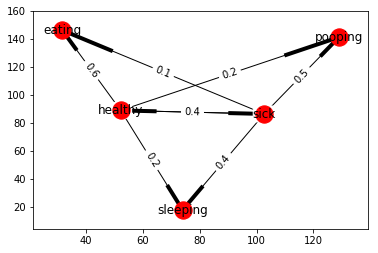

In [12]:
# Create graph object
G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(hidden_states)
print('Nodes:', G.nodes())

# Edges represent hidden probabilities
for k, v in hide_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight = v, label = v)

# Edges represents emission probabilities
for k, v in emit_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight = v, label = v)

print('Edges')
pprint(G.edges(data = True))

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog = 'neato')
nx.draw_networkx(G, pos)

# Create edge labels for jupyter plot but is not necessary
emit_edge_labels = {(n1, n2): d['label'] for n1, n2, d in G.edges(data = True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels = emit_edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'pet_dog_hidden_markov.dot')

In [27]:
# observation sequence of dog's behaviour
# observations are encoded numerically

obs_map = {'sleeping': 0, 'eating': 1, 'pooping': 2}
obs = np.array([1,1,2,1,0,1,2,1,0,2,2,0,1,0,1])

inv_obs_map = dict((v, k) for k, v in obs_map.items())
obs_seq = [inv_obs_map[v] for v in list(obs)]

print(pd.DataFrame(np.column_stack([obs, obs_seq]), 
                   columns = ['Obs_code', 'Obs_seq']))

   Obs_code   Obs_seq
0         1    eating
1         1    eating
2         2   pooping
3         1    eating
4         0  sleeping
5         1    eating
6         2   pooping
7         1    eating
8         0  sleeping
9         2   pooping
10        2   pooping
11        0  sleeping
12        1    eating
13        0  sleeping
14        1    eating


In [23]:
def viterbi(pi, a, b, obs):
    print('a:\n', a, '\n')
    print('b:\n', b, '\n')
    
    n_states = np.shape(b)[0]
    print('n_states:\n', n_states, '\n')
    T = np.shape(obs)[0]
    
    # init blank path
    path = np.zeros(T)
    print('path:\n', path, '\n')
    
    # delta --> highest probability of any path that reaches state i
    delta = np.zeros((n_states, T))
    print('delta:\n', delta, '\n')
    
    # phi --> argmax by time step for each state
    phi = np.zeros((n_states, T))
    print('phi:\n', phi, '\n')
    
    # init delta and phi
    delta[:, 0] = pi * b[:, obs[0]]
    phi[:, 0] = 0
    print('init_delta:\n', delta, '\n')
    print('init_phi:\n', phi, '\n')
    
    print('Start walk forward')
    
    # Start from index 1, since the value at index 0 will be initialized
    for t in range(1, T):
        # n_states is [healthy, sick]
        for s in range(n_states):
            # a is the hidden transition matrix
            delta[s, t] = np.max(delta[:, t - 1] * a[:, s]) * b[s, obs[t]]
            phi[s, t] = np.argmax(delta[:, t - 1] * a[:, s])
            print('s={s} and t={t}: phi[{s}, {t}] = {phi}'.format(s = s, t = t, phi = phi[s, t]))
    
    # find optimal path
    print('-' * 50)
    print('Start backtrace')
    path[T - 1] = np.argmax(delta[:, T - 1])
    
    for t in range(T - 2, -1, -1):
        path[t] = phi[int(path[t + 1]), [t + 1]]
        print('path[{}] = {}'.format(t, path[t]))
    return path, delta, phi

path, delta, phi = viterbi(pi, a, b, obs)
print('single best state path', path)
print('delta', delta)
print('phi', phi)

a:
 [[0.7 0.3]
 [0.4 0.6]] 

b:
 [[0.2 0.6 0.2]
 [0.4 0.1 0.5]] 

n_states:
 2 

path:
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] 

delta:
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]] 

phi:
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]] 

init_delta:
 [[ 0.3   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.  ]
 [ 0.05  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.  ]] 

init_phi:
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]] 

Start walk forward
[0.7 0.4]
s=0 and t=1: phi[0, 1] = 0.0
[0.3 0.6]
s=1 and t=1: phi[1, 1] = 0.0
[0.7 0.4]
s=0 and t=2: phi[0, 2] = 0.0
[0.3 0.6]
s=1 and t=2: phi[1, 2] = 0.0
[0.7 0.4]
s=0 and t=3: phi[0, 3] = 0.0
[0.3 0.6]
s=1 and t=

In [28]:
state_map = {0: 'healthy', 1: 'sick'}
state_path = [state_map[v] for v in path]

(pd.DataFrame().assign(Observation = obs_seq).assign(Best_Path = state_path))

,Observation,Best_Path
0,eating,healthy
1,eating,healthy
2,pooping,healthy
3,eating,healthy
4,sleeping,healthy
5,eating,healthy
6,pooping,healthy
7,eating,healthy
8,sleeping,sick
9,pooping,sick
